<a href="https://colab.research.google.com/github/Venkatesan6128/Forecasting-house/blob/main/Googlecolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Load the Dataset

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/raw_sales (1).csv')
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


Data Exploration

In [ ]:
# Dataset Info
df.info()

# Summary Statistics
df.describe()

# First few records
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


Check for Missing Values and Duplicates

In [ ]:
import pandas as pd

# Example: Create a sample DataFrame or load one
# Option 1: Create manually
data = {'A': [1, 2, 2, None], 'B': [4, None, 4, 4]}
df = pd.DataFrame(data)

# Option 2: Load from a file (e.g., CSV)
# df = pd.read_csv('your_file.csv')

Visualize a Few Features

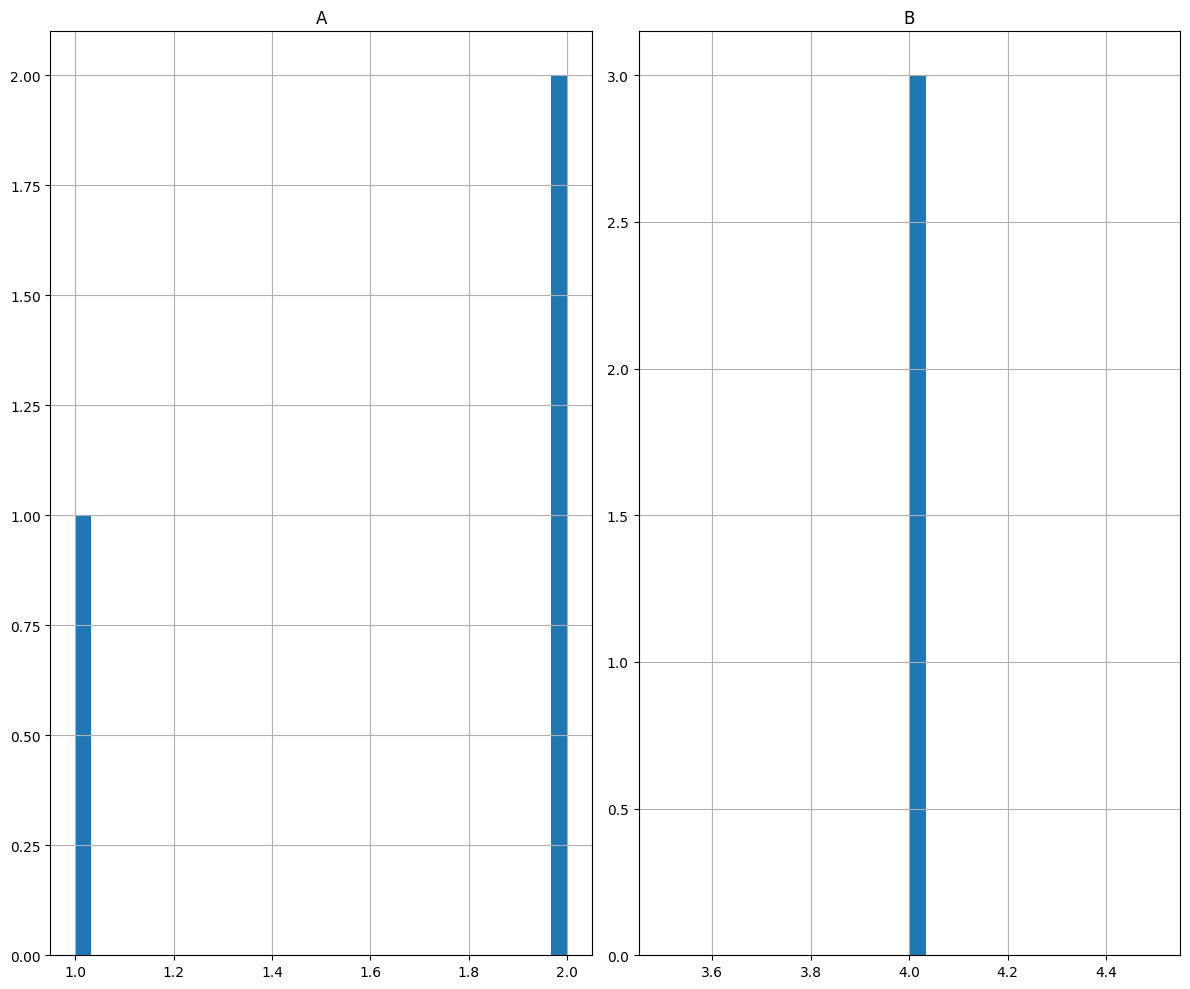

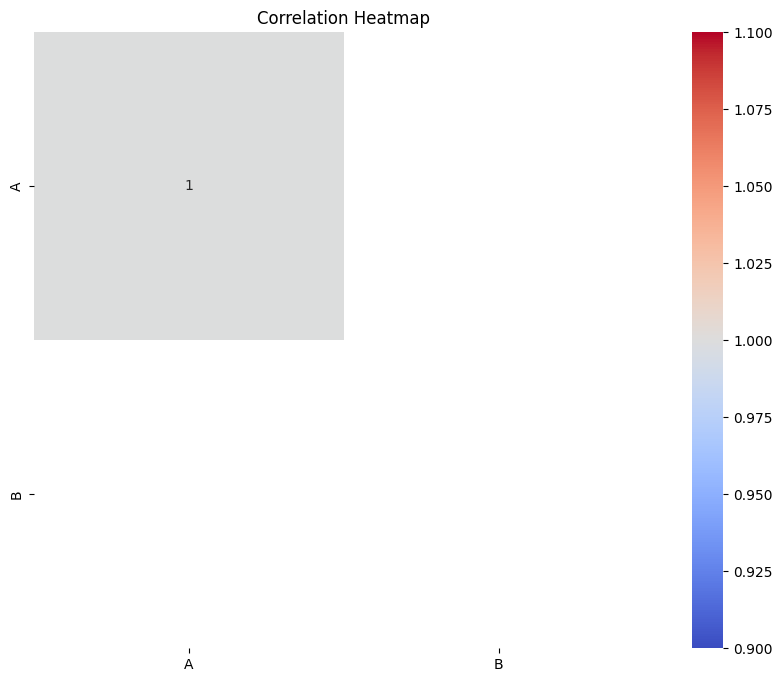

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of numerical columns
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Identify Target and Features

In [ ]:
import os
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())


Current working directory: /content
Files in current directory: ['.config', 'raw_sales (1).csv', 'sample_data']


Convert Categorical Columns to Numerical

In [ ]:
import os

print("Current working directory:", os.getcwd())
print("Files in this directory:", os.listdir())


Current working directory: /content
Files in this directory: ['.config', 'raw_sales (1).csv', 'sample_data']


One-Hot Encoding

In [ ]:
import os

# Check where Python is looking
print("Current working directory:", os.getcwd())

# List all files in that directory
print("Files in this directory:", os.listdir())


Current working directory: /content
Files in this directory: ['.config', 'raw_sales (1).csv', 'sample_data']


Feature Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/raw_sales (1).csv')  # Make sure this file exists

# Define X
X = df.copy()  # Or df.drop('target_column', axis=1)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# (Optional) Convert scaled array back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
print(X_scaled_df.head())


   postcode     price  bedrooms  datesold_2007-02-27 00:00:00  \
0 -0.840063 -0.300800  0.788251                     -0.005814   
1  1.197904 -1.135011 -0.262987                    171.985465   
2  1.191088 -1.000118 -0.262987                     -0.005814   
3  1.191088 -0.815526  0.788251                     -0.005814   
4  1.197904 -1.064015 -0.262987                     -0.005814   

   datesold_2007-03-07 00:00:00  datesold_2007-03-09 00:00:00  \
0                     -0.005814                     -0.005814   
1                     -0.005814                     -0.005814   
2                    171.985465                     -0.005814   
3                     -0.005814                    171.985465   
4                     -0.005814                     -0.005814   

   datesold_2007-03-21 00:00:00  datesold_2007-04-04 00:00:00  \
0                     -0.005814                     -0.005814   
1                     -0.005814                     -0.005814   
2                     -

Train-Test Split

In [ ]:
# Target and features
target = 'price'
features = ['datesold', 'postcode', 'propertyType', 'bedrooms']

X = df[features]
y = df[target]

Model Building

In [ ]:
import os
print(os.getcwd())


/content


Evaluation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate mock data
np.random.seed(42)
n_samples = 500
df = pd.DataFrame({
    'datesold': pd.date_range(start='2018-01-01', periods=n_samples, freq='D'),
    'postcode': np.random.randint(1000, 9999, size=n_samples),
    'propertyType': np.random.choice(['House', 'Unit', 'Townhouse'], size=n_samples),
    'bedrooms': np.random.randint(1, 5, size=n_samples),
    'price': np.random.randint(100000, 1000000, size=n_samples)
})

# Target and features
target = 'price'
features = ['datesold', 'postcode', 'propertyType', 'bedrooms']

X = df[features]
y = df[target]

# Convert 'datesold' to datetime and extract useful features
X['datesold'] = pd.to_datetime(X['datesold'])
X['year'] = X['datesold'].dt.year
X['month'] = X['datesold'].dt.month
X = X.drop('datesold', axis=1)

# One-hot encode categorical column
X = pd.get_dummies(X, columns=['propertyType'], drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

<ipython-input-14-2d032475104e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datesold'] = pd.to_datetime(X['datesold'])


R² Score: -0.22806619582534382
Mean Squared Error: 75459008443.73859


Make Predictions from New Input

In [ ]:
# Example dictionary (adjust keys to match your actual features)
new_data = {
    'Bedrooms': 3,
    'Bathrooms': 2,
    'SqFt': 1500,
    'Location': 'Downtown',  # Example categorical
    # Add other features as needed...
}
new_df = pd.DataFrame([new_data])


Convert to DataFrame and Encode

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create mock data
np.random.seed(42)
n_samples = 300
df = pd.DataFrame({
    'datesold': pd.date_range(start='2021-01-01', periods=n_samples, freq='D'),
    'postcode': np.random.randint(1000, 9999, n_samples),
    'propertyType': np.random.choice(['House', 'Unit', 'Townhouse'], size=n_samples),
    'bedrooms': np.random.randint(1, 5, n_samples),
    'price': np.random.randint(150000, 1000000, n_samples)
})

# Preprocessing date
df['datesold'] = pd.to_datetime(df['datesold'])
df['year'] = df['datesold'].dt.year
df['month'] = df['datesold'].dt.month
df = df.drop(columns=['datesold'])

# Split features and target
X = df.drop(columns=['price'])
y = df['price']

# Define column types
categorical_cols = ['propertyType']
numerical_cols = ['postcode', 'bedrooms', 'year', 'month']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Full pipeline with model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: -0.18492132175595444
Mean Squared Error: 66698791659.67322


Predict the Final Price

In [ ]:
import glob
import os

search_path = os.path.expanduser("")
for file in glob.glob(search_path, recursive=True):
    print(file)

Deployment - Building an Interactive App (Gradio)

In [ ]:
!pip install gradio

import gradio as gr

def predict_price(**kwargs):
    input_df = pd.DataFrame([kwargs])
    input_encoded = pd.get_dummies(input_df)
    input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)
    input_scaled = scaler.transform(input_encoded)
    prediction = model.predict(input_scaled)
    return "${:,.2f}".format(prediction[0])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00


Create a Prediction Function (Gradio UI)

In [ ]:

import gradio as gr

def predict_price(bedrooms, bathrooms, sqft, location):
    # Dummy prediction logic – replace with your model's prediction
    return f"Predicted price for {bedrooms} BR, {bathrooms} Bath, {sqft} SqFt in {location} is $XXX,XXX"

# Customize input widgets for your specific features
input_fields = [
    gr.Textbox(label="Bedrooms"),
    gr.Textbox(label="Bathrooms"),
    gr.Textbox(label="SqFt"),
    gr.Textbox(label="Location"),  # Example categorical feature
    # Add more fields as per your dataset
]

gr.Interface(fn=predict_price, inputs=input_fields, outputs="text", title="House Price Predictor").launch()